### Load Data and Initial Check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'E:\Deep Learning Fundementals\A3\Apple_stock_price.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2014/1/2,19.845715,19.893929,19.715000,19.754642,17.234303,234684800,0.0,0
1,2014/1/3,19.745001,19.775000,19.301071,19.320715,16.855730,392467600,0.0,0
2,2014/1/6,19.194643,19.528570,19.057142,19.426071,16.947649,412610800,0.0,0
3,2014/1/7,19.440001,19.498571,19.211430,19.287144,16.826448,317209200,0.0,0
4,2014/1/8,19.243214,19.484285,19.238930,19.409287,16.932999,258529600,0.0,0


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2.727000e+03,2727.000000,2727.000000
mean,87.381725,88.308522,86.505727,87.448637,85.281132,1.306852e+08,0.002889,0.004034
std,63.507333,64.173788,62.872752,63.556788,63.995351,8.379349e+07,0.023477,0.154364
min,17.684999,17.911785,17.626785,17.849285,15.572027,2.404830e+07,0.000000,0.000000
25%,31.376250,31.575001,31.063750,31.297501,28.123636,7.524765e+07,0.000000,0.000000
50%,52.494999,53.035000,52.032501,52.437500,50.484169,1.074970e+08,0.000000,0.000000
75%,147.355003,149.065002,145.824997,147.674995,145.508247,1.622867e+08,0.000000,0.000000
max,236.479996,237.490005,234.449997,236.479996,236.220108,1.065523e+09,0.250000,7.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2727 entries, 0 to 2726
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2727 non-null   object 
 1   Open          2727 non-null   float64
 2   High          2727 non-null   float64
 3   Low           2727 non-null   float64
 4   Close         2727 non-null   float64
 5   Adj Close     2727 non-null   float64
 6   Volume        2727 non-null   int64  
 7   Dividends     2727 non-null   float64
 8   Stock Splits  2727 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 191.9+ KB


In [6]:
data.isnull().sum() # there is no missing values in the provided dataset

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Explotory Data Analysis

In [7]:
#  transfer datetime format for visiluization
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [8]:
print("Dates Range from :", data.index.min(), "to", data.index.max())
print("Time Stamps Difference Count:", data.index.to_series().diff().value_counts())

Dates Range from : 2014-01-02 00:00:00 to 2024-10-31 00:00:00
Time Stamps Difference Count: Date
1 days    2138
3 days     489
4 days      76
2 days      23
Name: count, dtype: int64


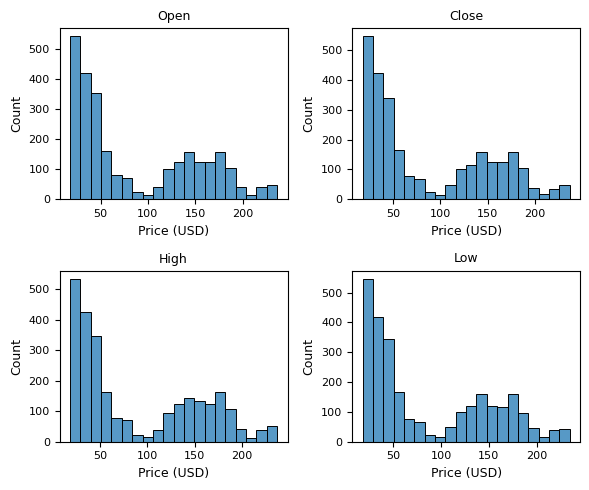

In [9]:
# histogram of all quantiable data
columns_to_plot = ['Open', 'Close', 'High', 'Low']

fig, axes = plt.subplots(2, 2, figsize=(6, 5))
axes = axes.flatten() 

for i, col in enumerate(columns_to_plot):
    if col in data.columns:
        sns.histplot(data[col], bins=20, ax=axes[i])
        axes[i].set_title(f'{col}', fontsize=9)
        axes[i].set_xlabel('Price (USD)', fontsize=9)
        axes[i].set_ylabel('Count', fontsize=9)
        axes[i].tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()

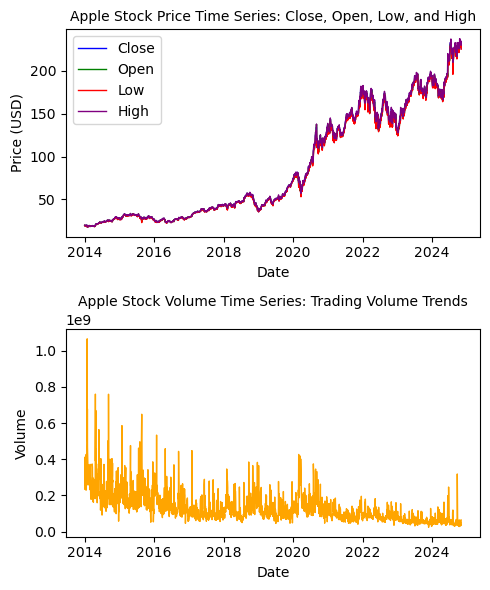

In [10]:
# plot time seriers for qutified data
columns_to_plot = ['Close', 'Open', 'Low', 'High']
colors = ['blue', 'green', 'red', 'purple']

fig, axes = plt.subplots(2, 1, figsize=(5, 6))

for col, color in zip(columns_to_plot, colors):
    if col in data.columns:
        axes[0].plot(data.index, data[col], label=col, color=color, linewidth=1)

axes[0].set_title('Apple Stock Price Time Series: Close, Open, Low, and High', fontsize=10)
axes[0].set_xlabel('Date', fontsize=10)
axes[0].set_ylabel('Price (USD)', fontsize=10)
axes[0].legend()

if 'Volume' in data.columns:
    axes[1].plot(data.index, data['Volume'], label='Volume', color='orange', linewidth=1)
    axes[1].set_title('Apple Stock Volume Time Series: Trading Volume Trends', fontsize=10)
    axes[1].set_xlabel('Date', fontsize=10)
    axes[1].set_ylabel('Volume', fontsize=10)

plt.tight_layout()
plt.show()

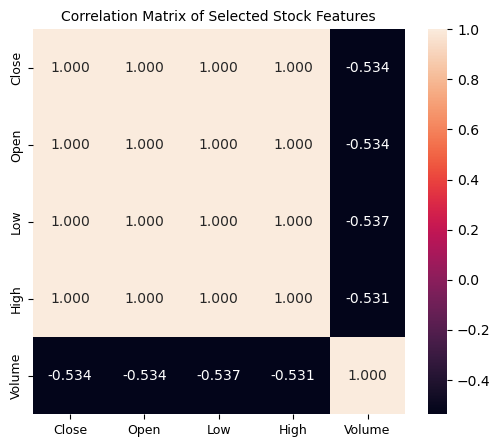

In [11]:
corr_selected_cols = ['Close', 'Open', 'Low', 'High', 'Volume']
data_for_corr = data[corr_selected_cols]

corr_matrix = data_for_corr.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".3f")
plt.title('Correlation Matrix of Selected Stock Features', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()

### Model Implementation

In [12]:
import tensorflow as tf
import random
import os

In [13]:
def set_seed(seed=42):
    
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seed(42)

#### Pre-process

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


from itertools import product
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, SimpleRNN,  Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError

In [15]:
features = data[['Close', 'Volume']]

# determine split indices
total_samples = len(features)
train_val_size = int(total_samples * 0.85)
train_size = int(train_val_size * 0.8)
val_size = int(train_val_size * 0.2)
test_size = total_samples - train_size - val_size

# split the data
train_data = features[:train_size]
val_data = features[train_size:train_size + val_size]
test_data = features[train_size + val_size:]

scaler = MinMaxScaler()

# fit scalers on training data and transform
train_scaled = scaler.fit_transform(train_data)

# transform validation and test data
val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)

In [16]:
print(train_data.shape, val_data.shape, test_data.shape)

(1853, 2) (463, 2) (411, 2)


In [17]:
def create_sequences(data, window_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        seq = data[i:i + window_size]
        target = data[i + window_size][0]  # predicting 'Close' price
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

#### Selecting LR

In [18]:
# define models
def create_lstm_model(window_size, n_features, learning_rate=0.001):
	model = Sequential()
	model.add(Input(shape=(window_size, n_features)))
	model.add(LSTM(50)) # refer to github work original set up number
	model.add(Dense(10, activation='relu'))
	model.add(Dense(1))
	optimizer = Adam(learning_rate=learning_rate) # refer to github work original set up number
	criterion = MeanSquaredError(reduction='sum_over_batch_size')
	model.compile(optimizer, loss=criterion)
	# model.compile(optimizer='adam', loss='mse')
	return model

def create_gru_model(window_size, n_features, learning_rate=0.001):
	model = Sequential()
	model.add(Input(shape=(window_size, n_features)))
	model.add(GRU(50))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(1))
	optimizer = Adam(learning_rate=learning_rate) # refer to github work original set up number
	criterion = MeanSquaredError(reduction='sum_over_batch_size')
	model.compile(optimizer, loss=criterion)
	return model

def create_rnn_model(window_size, n_features, learning_rate=0.001):
	model = Sequential()
	model.add(Input(shape=(window_size, n_features)))
	model.add(SimpleRNN(50))
	model.add(Dense(10, activation='relu'))	
	model.add(Dense(1))
	optimizer = Adam(learning_rate=learning_rate) # refer to github work original set up number
	criterion = MeanSquaredError(reduction='sum_over_batch_size')
	model.compile(optimizer, loss=criterion)
	return model

In [19]:
window_size = 5
learning_rates = [1e-4, 5e-4, 1e-5]
results = []
histories = []  

In [20]:
# early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

In [21]:
for learning_rate in learning_rates:
    print(f"\nTraining models with learning rate: {learning_rate}")

    # create sequences for training, validation, and testing
    X_train, y_train = create_sequences(train_scaled, window_size)
    X_val, y_val = create_sequences(val_scaled, window_size)
    X_test, y_test = create_sequences(test_scaled, window_size)
    
    # reshape input data to 3D (samples, time steps, features)
    n_features = X_train.shape[2]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

    models = {
        'LSTM': create_lstm_model(window_size, n_features, learning_rate=learning_rate),
        'GRU': create_gru_model(window_size, n_features, learning_rate=learning_rate),
        'RNN': create_rnn_model(window_size, n_features, learning_rate=learning_rate)
    }

    # train and evaluate each model
    for model_name, model in models.items():
        print(f"\nTraining {model_name} model...")
        history = model.fit(
            X_train, 
            y_train,
            epochs=30,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            shuffle=False, #repeated result
            verbose=0  # hide process
        )

        # make predictions
        y_val_pred = model.predict(X_val)

        # inverse transform predictions and actual values
        y_val_pred_inv = scaler.inverse_transform(np.concatenate([y_val_pred, np.zeros((y_val_pred.shape[0], n_features - 1))], axis=1))[:, 0]
        y_val_actual_inv = scaler.inverse_transform(np.concatenate([y_val.reshape(-1,1), np.zeros((y_val.shape[0], n_features - 1))], axis=1))[:, 0]

        # calculate performance metrics rmse, mae, mape
        rmse = np.sqrt(mean_squared_error(y_val_actual_inv, y_val_pred_inv))
        mae = mean_absolute_error(y_val_actual_inv, y_val_pred_inv)
        mape = mean_absolute_percentage_error(y_val_actual_inv, y_val_pred_inv) * 100
        
        # directional accuarcy
        direction_actual = np.sign(np.diff(y_val_actual_inv))
        direction_pred = np.sign(np.diff(y_val_pred_inv))
        directional_accuracy = np.mean(direction_actual == direction_pred) * 100


        print(f"{model_name} RMSE: {rmse:.4f}, MAE: {mae:.4f}")
        
        histories.append({
            'Learning Rate': learning_rate,
            'Model': model_name,
            'History': history.history
        })
        
        # save results
        results.append({
            'Learning Rate': learning_rate,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'Direction Acc': directional_accuracy       
                })


Training models with learning rate: 0.0001

Training LSTM model...
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
LSTM RMSE: 4.6369, MAE: 3.6690

Training GRU model...
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
GRU RMSE: 4.7991, MAE: 3.7399

Training RNN model...
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
RNN RMSE: 12.9311, MAE: 11.1295

Training models with learning rate: 0.0005

Training LSTM model...
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
LSTM RMSE: 4.4013, MAE: 3.4863

Training GRU model...
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
GRU RMSE: 3.7196, MAE: 2.9408

Training RNN model...
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
RNN RMSE: 10.5991, MAE: 8.6235

Training models with learning rate: 1e-05

Training LSTM model...
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
LSTM RMSE: 103.1341, MAE: 102.5308

Training GRU model...
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
GRU RMSE: 106.6273, MAE: 105.9679

Training RNN model...
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
RNN RMSE: 20.9466, MAE: 19.1315


In [22]:
lr_res = pd.DataFrame(results)
print(lr_res)

   Learning Rate Model        RMSE         MAE       MAPE  Direction Acc
0        0.00010  LSTM    4.636943    3.668989   2.399435      47.702407
1        0.00010   GRU    4.799128    3.739942   2.422298      47.702407
2        0.00010   RNN   12.931086   11.129483   7.056878      46.827133
3        0.00050  LSTM    4.401312    3.486318   2.298392      47.483589
4        0.00050   GRU    3.719601    2.940834   1.935605      47.264770
5        0.00050   RNN   10.599122    8.623503   5.442942      46.389497
6        0.00001  LSTM  103.134141  102.530838  67.560813      51.859956
7        0.00001   GRU  106.627297  105.967850  69.806034      50.328228
8        0.00001   RNN   20.946595   19.131529  12.248026      48.358862


In [23]:
lr_res_sorted = lr_res.sort_values(by='MAPE', ascending=True)
lr_res_sorted.reset_index(drop=True, inplace=True)

lr_res_sorted['Model'] = lr_res_sorted['Model'].astype(str)
top_n = 1
top_configs = lr_res_sorted.groupby('Model').head(top_n).reset_index(drop=True)

print(top_configs)

   Learning Rate Model       RMSE       MAE      MAPE  Direction Acc
0         0.0005   GRU   3.719601  2.940834  1.935605      47.264770
1         0.0005  LSTM   4.401312  3.486318  2.298392      47.483589
2         0.0005   RNN  10.599122  8.623503  5.442942      46.389497


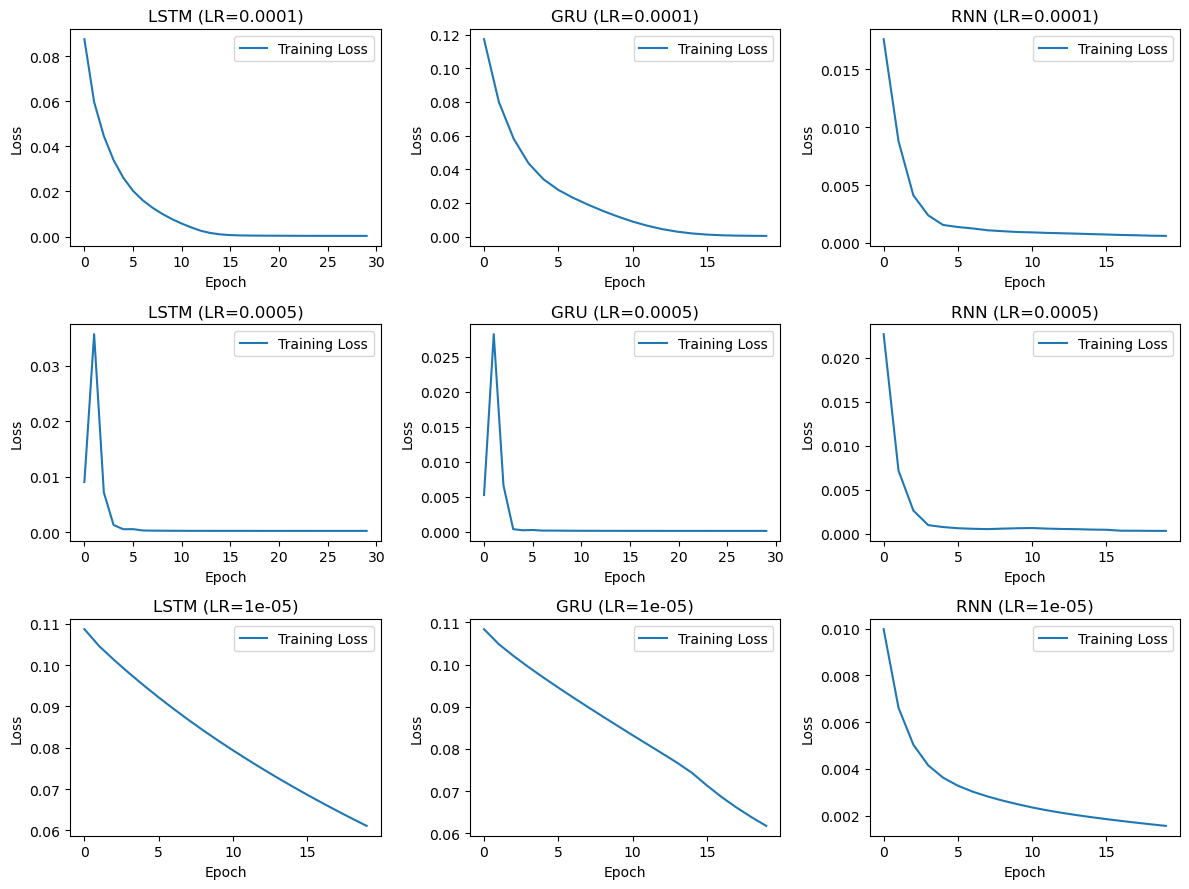

In [24]:
total_histories = len(histories)
cols = 3
rows = (total_histories + cols - 1) // cols

plt.figure(figsize=(cols * 4, rows * 3))

for idx, record in enumerate(histories):
    plt.subplot(rows, cols, idx + 1)
    plt.plot(record['History']['loss'], label='Training Loss')
    plt.title(f"{record['Model']} (LR={record['Learning Rate']})")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

#### Tune Hyperparameters

In [25]:
set_seed(42)

In [26]:
# define models
def create_lstm_model(window_size, n_features, hidden_units, dropout_rate, fc_size, learning_rate):
	model = Sequential()
	model.add(Input(shape=(window_size, n_features)))
	model.add(LSTM(hidden_units))
	model.add(Dropout(dropout_rate))
	model.add(Dense(fc_size, activation='relu'))
	model.add(Dense(1))
	optimizer = Adam(learning_rate=learning_rate) # refer to github work original set up number
	criterion = MeanSquaredError(reduction='sum_over_batch_size')
	model.compile(optimizer, loss=criterion)
	return model

def create_gru_model(window_size, n_features, hidden_units, dropout_rate, fc_size, learning_rate):
	model = Sequential()
	model.add(Input(shape=(window_size, n_features)))
	model.add(GRU(hidden_units))
	model.add(Dropout(dropout_rate))
	model.add(Dense(fc_size, activation='relu'))
	model.add(Dense(1))
	optimizer = Adam(learning_rate=learning_rate) # refer to github work original set up number
	criterion = MeanSquaredError(reduction='sum_over_batch_size')
	model.compile(optimizer, loss=criterion)
	return model

def create_rnn_model(window_size, n_features, hidden_units, dropout_rate, fc_size, learning_rate):
	model = Sequential()
	model.add(Input(shape=(window_size, n_features)))
	model.add(SimpleRNN(hidden_units, activation='tanh'))
	model.add(Dropout(dropout_rate))
	model.add(Dense(fc_size, activation='relu'))
	model.add(Dense(1))
	optimizer = Adam(learning_rate=learning_rate) # refer to github work original set up number
	criterion = MeanSquaredError(reduction='sum_over_batch_size')
	model.compile(optimizer, loss=criterion)
	return model

#### RNN

In [27]:
window_size = 5
learning_rate = 5e-4
hidden_units_list = [16, 64, 128]       # hidden unit sizes
dropout_rates = [0.1, 0.3]               # dropout rates
fc_sizes = [8, 16]                      # fully connected layer sizes

results = []
histories = []

In [28]:
# early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

In [29]:
set_seed(42)

In [30]:
for hidden_units, dropout_rate, fc_size in product(hidden_units_list, dropout_rates, fc_sizes):
    print(f"\n fixed para: LR={learning_rate}, Window size={window_size}")
    print(f"\nTraining RNN with Hidden Units: {hidden_units}, Dropout Rate: {dropout_rate}, FC Size: {fc_size}")
    
    # create series
    X_train, y_train = create_sequences(train_scaled, window_size)
    X_val, y_val = create_sequences(val_scaled, window_size)
    X_test, y_test = create_sequences(test_scaled, window_size)
    
    # reshape input data to 3D (samples, time steps, features)
    n_features = X_train.shape[2]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
    
    # define models
    model = create_rnn_model(window_size=window_size, n_features=n_features, learning_rate=learning_rate, 
                             hidden_units=hidden_units, 
                             dropout_rate=dropout_rate, 
                             fc_size=fc_size)
    
    history = model.fit(
            X_train, 
            y_train,
            epochs=30,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            shuffle=False,  # ensure repeated
            verbose=0  # hide process
        )
        
        
	# check predict 
    y_val_pred = model.predict(X_val)
	
	# inverse transform predictions and actual values
    y_val_pred_inv = scaler.inverse_transform(np.concatenate([y_val_pred, np.zeros((y_val_pred.shape[0], n_features - 1))], axis=1))[:, 0]
    y_val_actual_inv = scaler.inverse_transform(np.concatenate([y_val.reshape(-1,1), np.zeros((y_val.shape[0], n_features - 1))], axis=1))[:, 0]
	
	# calculate performance metrics rmse, mae, mape
    rmse = np.sqrt(mean_squared_error(y_val_actual_inv, y_val_pred_inv))
    mae = mean_absolute_error(y_val_actual_inv, y_val_pred_inv)
    mape = mean_absolute_percentage_error(y_val_actual_inv, y_val_pred_inv) * 100
	
	# directional accuarcy
    direction_actual = np.sign(np.diff(y_val_actual_inv))
    direction_pred = np.sign(np.diff(y_val_pred_inv))
    directional_accuracy = np.mean(direction_actual == direction_pred) * 100
	
    print(f"RNN RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    
    histories.append({
		'Hidden Units': hidden_units,
		'Dropout Rate': dropout_rate,
		'FC Size': fc_size,
		'Model': 'RNN',
		'History': history.history
	})
    
    # save result
    results.append({
		'Hidden Units': hidden_units,
		'Dropout Rate': dropout_rate,
		'FC Size': fc_size,
		'Model': 'RNN',
		'RMSE': rmse,
		'MAE': mae,
		'MAPE': mape,
		'Direction Acc': directional_accuracy
	})


 fixed para: LR=0.0005, Window size=5

Training RNN with Hidden Units: 16, Dropout Rate: 0.1, FC Size: 8
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
RNN RMSE: 7.4198, MAE: 6.4060

 fixed para: LR=0.0005, Window size=5

Training RNN with Hidden Units: 16, Dropout Rate: 0.1, FC Size: 16
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
RNN RMSE: 14.7149, MAE: 13.0042

 fixed para: LR=0.0005, Window size=5

Training RNN with Hidden Units: 16, Dropout Rate: 0.3, FC Size: 8
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
RNN RMSE: 20.5461, MAE: 19.6456

 fixed para: LR=0.0005, Window size=5

Training RNN with Hidden Units: 16, Dropout Rate: 0.3, FC Size: 16
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
RNN RMSE: 10.6910, MAE: 9.4749

 fixed para: LR=0.0005, Window size=5

Training RNN with Hidden Units: 64, Dropout Rate: 0.1, FC Size: 8
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
RNN RMSE: 7.9938, MAE: 6.8322

 fixed para: LR=0.0005, Window size=5

Training RNN with Hidden Units: 64, Dropout Rate: 0.1, FC Size: 16
15/15 

In [31]:
tuned_res_rnn = pd.DataFrame(results)
print(tuned_res_rnn)

    Hidden Units  Dropout Rate  FC Size Model       RMSE        MAE  \
0             16           0.1        8   RNN   7.419765   6.406027   
1             16           0.1       16   RNN  14.714886  13.004166   
2             16           0.3        8   RNN  20.546106  19.645648   
3             16           0.3       16   RNN  10.691040   9.474885   
4             64           0.1        8   RNN   7.993750   6.832207   
5             64           0.1       16   RNN   7.456818   5.913754   
6             64           0.3        8   RNN   9.222474   7.810371   
7             64           0.3       16   RNN  21.783020  20.850086   
8            128           0.1        8   RNN   8.985200   7.838396   
9            128           0.1       16   RNN   3.993620   3.041865   
10           128           0.3        8   RNN   6.011198   4.936656   
11           128           0.3       16   RNN   4.661403   3.574627   

         MAPE  Direction Acc  
0    4.109271      47.702407  
1    8.279710 

In [32]:
tuned_res_rnn_sorted = tuned_res_rnn.sort_values(by='RMSE', ascending=True)
tuned_res_rnn_sorted.reset_index(drop=True, inplace=True)

tuned_res_rnn_sorted['Model'] = tuned_res_rnn_sorted['Model'].astype(str)
top_n = 3
top_configs = tuned_res_rnn_sorted.groupby('Model').head(top_n).reset_index(drop=True)

print(top_configs)

   Hidden Units  Dropout Rate  FC Size Model      RMSE       MAE      MAPE  \
0           128           0.1       16   RNN  3.993620  3.041865  1.990416   
1           128           0.3       16   RNN  4.661403  3.574627  2.314257   
2           128           0.3        8   RNN  6.011198  4.936656  3.171672   

   Direction Acc  
0      50.109409  
1      53.172867  
2      49.452954  


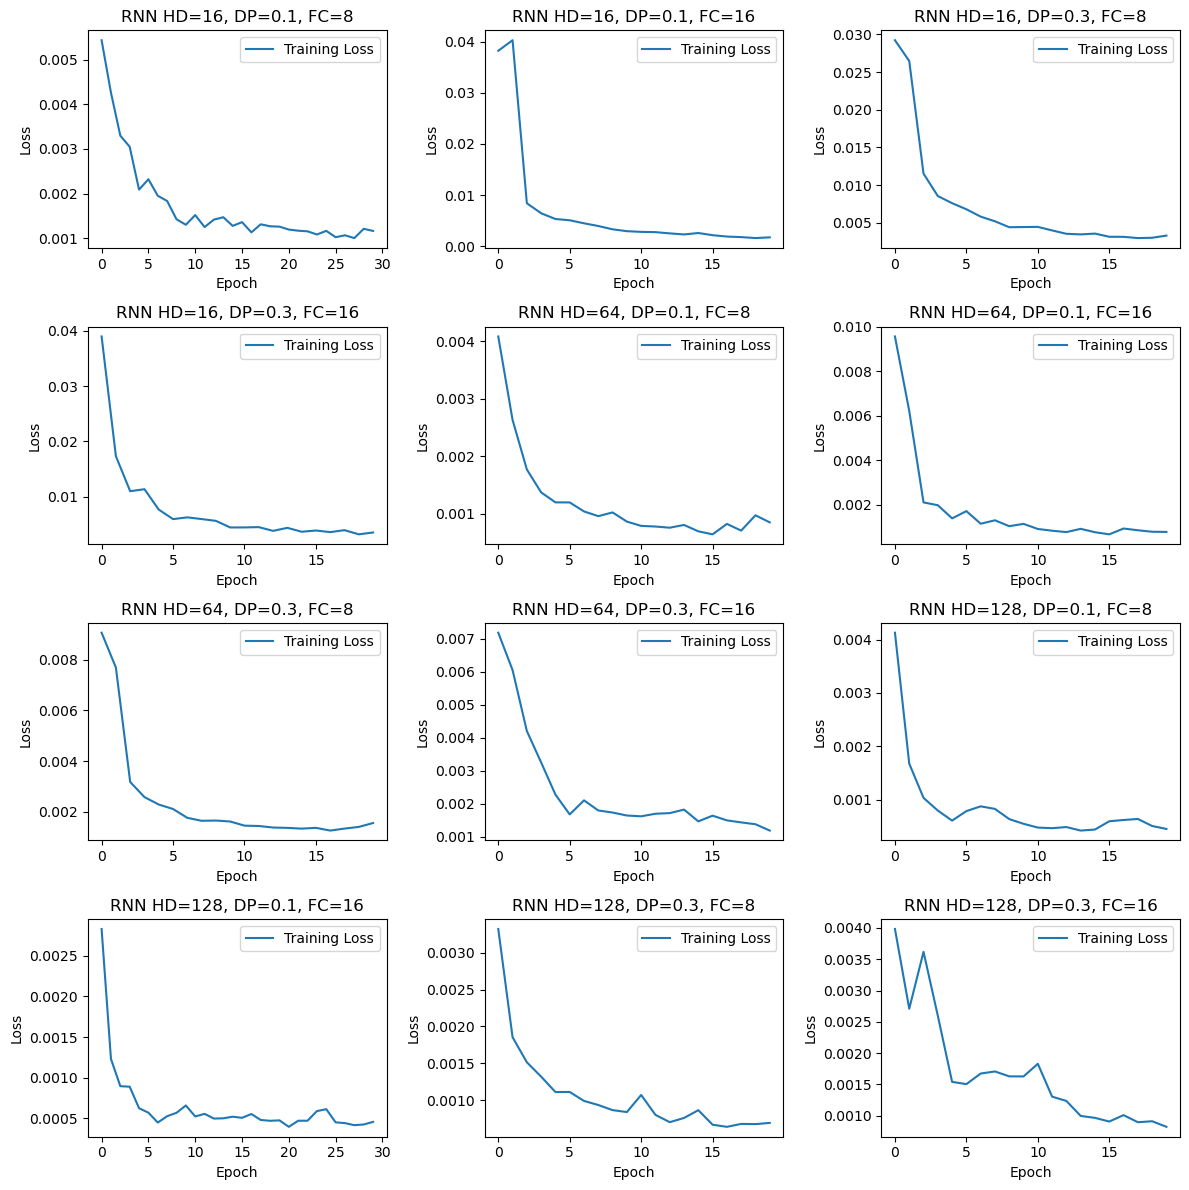

In [33]:
total_histories = len(histories)
cols = 3
rows = (total_histories + cols - 1) // cols

plt.figure(figsize=(cols * 4, rows * 3))

for idx, record in enumerate(histories):
    plt.subplot(rows, cols, idx + 1)
    plt.plot(record['History']['loss'], label='Training Loss')
    # plt.plot(record['History']['val_loss'], label='Validation Loss')
    plt.title(f"RNN HD={record['Hidden Units']}, DP={record['Dropout Rate']}, FC={record['FC Size']}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

#### LSTM

In [34]:
window_size = 5
learning_rate = 1e-4
hidden_units_list = [16, 32, 64]       # hidden unit sizes
dropout_rates = [0.1, 0.3]               # dropout rates
fc_sizes = [8, 16]                      # fully connected layer sizes

results = []
histories = []

In [35]:
# early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

In [36]:
set_seed(42)

In [37]:
for hidden_units, dropout_rate, fc_size in product(hidden_units_list, dropout_rates, fc_sizes):
    print(f"\n fixed para: LR={learning_rate}, Window size={window_size}")
    print(f"\nTraining LSTM with Hidden Units: {hidden_units}, Dropout Rate: {dropout_rate}, FC Size: {fc_size}")
    
    # create series
    X_train, y_train = create_sequences(train_scaled, window_size)
    X_val, y_val = create_sequences(val_scaled, window_size)
    X_test, y_test = create_sequences(test_scaled, window_size)
    
    # reshape input data to 3D (samples, time steps, features)
    n_features = X_train.shape[2]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
    
    # define models
    model = create_lstm_model(window_size=window_size, n_features=n_features, learning_rate=learning_rate, 
                             hidden_units=hidden_units, 
                             dropout_rate=dropout_rate, 
                             fc_size=fc_size)
    
    history = model.fit(
            X_train, 
            y_train,
            epochs=30,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            shuffle=False,  # ensure repeated
            verbose=0  # hide process
        )
        
        
	# check predict 
    y_val_pred = model.predict(X_val)
	
	# inverse transform predictions and actual values
    y_val_pred_inv = scaler.inverse_transform(np.concatenate([y_val_pred, np.zeros((y_val_pred.shape[0], n_features - 1))], axis=1))[:, 0]
    y_val_actual_inv = scaler.inverse_transform(np.concatenate([y_val.reshape(-1,1), np.zeros((y_val.shape[0], n_features - 1))], axis=1))[:, 0]
	
	# calculate performance metrics rmse, mae, mape
    rmse = np.sqrt(mean_squared_error(y_val_actual_inv, y_val_pred_inv))
    mae = mean_absolute_error(y_val_actual_inv, y_val_pred_inv)
    mape = mean_absolute_percentage_error(y_val_actual_inv, y_val_pred_inv) * 100
	
	# directional accuarcy
    direction_actual = np.sign(np.diff(y_val_actual_inv))
    direction_pred = np.sign(np.diff(y_val_pred_inv))
    directional_accuracy = np.mean(direction_actual == direction_pred) * 100
	
    print(f"LSTM RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    
    histories.append({
		'Hidden Units': hidden_units,
		'Dropout Rate': dropout_rate,
		'FC Size': fc_size,
		'Model': 'LSTM',
		'History': history.history
	})
    
    # save result
    results.append({
		'Hidden Units': hidden_units,
		'Dropout Rate': dropout_rate,
		'FC Size': fc_size,
		'Model': 'LSTM',
		'RMSE': rmse,
		'MAE': mae,
		'MAPE': mape,
		'Direction Acc': directional_accuracy
	})


 fixed para: LR=0.0001, Window size=5

Training LSTM with Hidden Units: 16, Dropout Rate: 0.1, FC Size: 8
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
LSTM RMSE: 9.1201, MAE: 8.0772

 fixed para: LR=0.0001, Window size=5

Training LSTM with Hidden Units: 16, Dropout Rate: 0.1, FC Size: 16
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
LSTM RMSE: 51.1812, MAE: 50.4507

 fixed para: LR=0.0001, Window size=5

Training LSTM with Hidden Units: 16, Dropout Rate: 0.3, FC Size: 8
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
LSTM RMSE: 56.8479, MAE: 56.1928

 fixed para: LR=0.0001, Window size=5

Training LSTM with Hidden Units: 16, Dropout Rate: 0.3, FC Size: 16
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
LSTM RMSE: 64.6386, MAE: 64.0208

 fixed para: LR=0.0001, Window size=5

Training LSTM with Hidden Units: 32, Dropout Rate: 0.1, FC Size: 8
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
LSTM RMSE: 33.8094, MAE: 33.0202

 fixed para: LR=0.0001, Window size=5

Training LSTM with Hidden Units: 32, Dropout Rate: 0.1, FC S

In [38]:
tuned_res_lstm = pd.DataFrame(results)
print(tuned_res_lstm)

    Hidden Units  Dropout Rate  FC Size Model       RMSE        MAE  \
0             16           0.1        8  LSTM   9.120140   8.077188   
1             16           0.1       16  LSTM  51.181190  50.450688   
2             16           0.3        8  LSTM  56.847896  56.192774   
3             16           0.3       16  LSTM  64.638583  64.020753   
4             32           0.1        8  LSTM  33.809354  33.020230   
5             32           0.1       16  LSTM  24.700299  23.934356   
6             32           0.3        8  LSTM  12.936205  12.197509   
7             32           0.3       16  LSTM  13.627789  12.979084   
8             64           0.1        8  LSTM   4.437339   3.548293   
9             64           0.1       16  LSTM   4.508923   3.524494   
10            64           0.3        8  LSTM   6.146943   4.835393   
11            64           0.3       16  LSTM   5.104448   3.960680   

         MAPE  Direction Acc  
0    5.204782      47.483589  
1   33.072209 

In [39]:
tuned_res_lstm_sorted = tuned_res_lstm.sort_values(by='RMSE', ascending=True)
tuned_res_lstm_sorted.reset_index(drop=True, inplace=True)

tuned_res_lstm_sorted['Model'] = tuned_res_lstm_sorted['Model'].astype(str)
top_n = 3
top_configs = tuned_res_lstm_sorted.groupby('Model').head(top_n).reset_index(drop=True)

print(top_configs)

   Hidden Units  Dropout Rate  FC Size Model      RMSE       MAE      MAPE  \
0            64           0.1        8  LSTM  4.437339  3.548293  2.340034   
1            64           0.1       16  LSTM  4.508923  3.524494  2.326178   
2            64           0.3       16  LSTM  5.104448  3.960680  2.620983   

   Direction Acc  
0      47.483589  
1      46.827133  
2      47.045952  


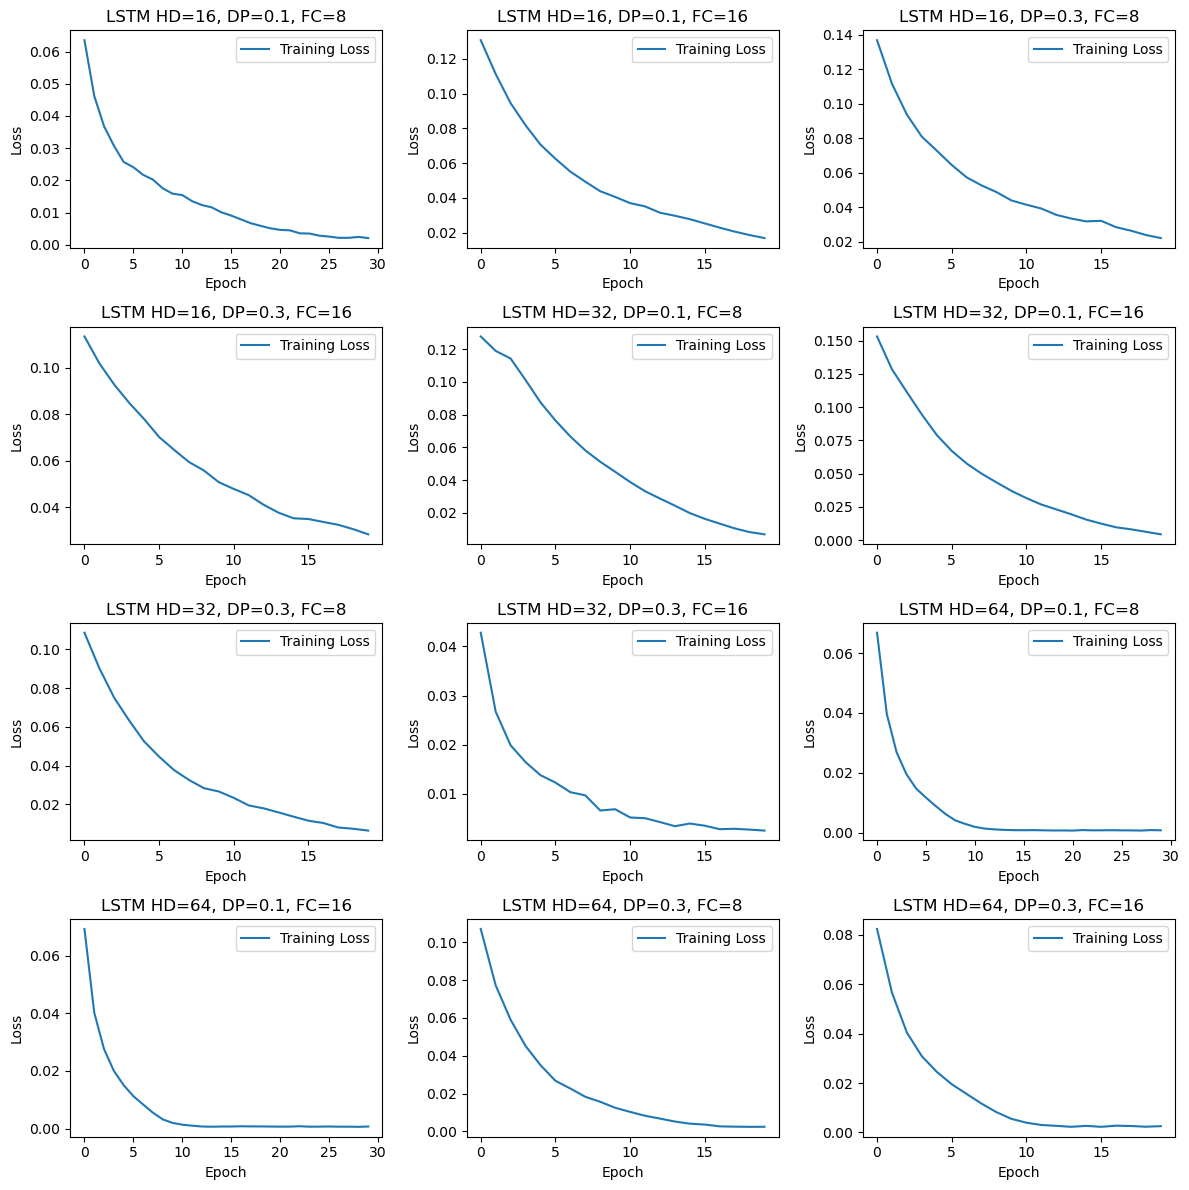

In [40]:
total_histories = len(histories)
cols = 3
rows = (total_histories + cols - 1) // cols

plt.figure(figsize=(cols * 4, rows * 3))

for idx, record in enumerate(histories):
    plt.subplot(rows, cols, idx + 1)
    plt.plot(record['History']['loss'], label='Training Loss')
    # plt.plot(record['History']['val_loss'], label='Validation Loss')
    plt.title(f"LSTM HD={record['Hidden Units']}, DP={record['Dropout Rate']}, FC={record['FC Size']}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

#### GRU

In [41]:
window_size = 5
learning_rate = 1e-4
hidden_units_list = [32, 64, 128]       # hidden unit sizes
dropout_rates = [0.1, 0.3]               # dropout rates
fc_sizes = [16, 32, 64]                      # fully connected layer sizes

results = []
histories = []

In [42]:
# early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

In [43]:
set_seed(42)

In [44]:
for hidden_units, dropout_rate, fc_size in product(hidden_units_list, dropout_rates, fc_sizes):
    print(f"\n fixed para: LR={learning_rate}, Window size={window_size}")
    print(f"\nTraining GRU with Hidden Units: {hidden_units}, Dropout Rate: {dropout_rate}, FC Size: {fc_size}")
    
    # create series
    X_train, y_train = create_sequences(train_scaled, window_size)
    X_val, y_val = create_sequences(val_scaled, window_size)
    X_test, y_test = create_sequences(test_scaled, window_size)
    
    # reshape input data to 3D (samples, time steps, features)
    n_features = X_train.shape[2]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
    
    # define models
    model = create_gru_model(window_size=window_size, n_features=n_features, learning_rate=learning_rate, 
                             hidden_units=hidden_units, 
                             dropout_rate=dropout_rate, 
                             fc_size=fc_size)
    
    history = model.fit(
            X_train, 
            y_train,
            epochs=30,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            shuffle=False,  # ensure repeated
            verbose=0  # hide process
        )
        
        
	# check predict 
    y_val_pred = model.predict(X_val)
	
	# inverse transform predictions and actual values
    y_val_pred_inv = scaler.inverse_transform(np.concatenate([y_val_pred, np.zeros((y_val_pred.shape[0], n_features - 1))], axis=1))[:, 0]
    y_val_actual_inv = scaler.inverse_transform(np.concatenate([y_val.reshape(-1,1), np.zeros((y_val.shape[0], n_features - 1))], axis=1))[:, 0]
	
	# calculate performance metrics rmse, mae, mape
    rmse = np.sqrt(mean_squared_error(y_val_actual_inv, y_val_pred_inv))
    mae = mean_absolute_error(y_val_actual_inv, y_val_pred_inv)
    mape = mean_absolute_percentage_error(y_val_actual_inv, y_val_pred_inv) * 100
	
	# directional accuarcy
    direction_actual = np.sign(np.diff(y_val_actual_inv))
    direction_pred = np.sign(np.diff(y_val_pred_inv))
    directional_accuracy = np.mean(direction_actual == direction_pred) * 100
	
    print(f"LSTM RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    
    histories.append({
		'Hidden Units': hidden_units,
		'Dropout Rate': dropout_rate,
		'FC Size': fc_size,
		'Model': 'GRU',
		'History': history.history
	})
    
    # save result
    results.append({
		'Hidden Units': hidden_units,
		'Dropout Rate': dropout_rate,
		'FC Size': fc_size,
		'Model': 'GRU',
		'RMSE': rmse,
		'MAE': mae,
		'MAPE': mape,
		'Direction Acc': directional_accuracy
	})


 fixed para: LR=0.0001, Window size=5

Training GRU with Hidden Units: 32, Dropout Rate: 0.1, FC Size: 16
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
LSTM RMSE: 6.9062, MAE: 5.6563

 fixed para: LR=0.0001, Window size=5

Training GRU with Hidden Units: 32, Dropout Rate: 0.1, FC Size: 32
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
LSTM RMSE: 14.0905, MAE: 13.1949

 fixed para: LR=0.0001, Window size=5

Training GRU with Hidden Units: 32, Dropout Rate: 0.1, FC Size: 64
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
LSTM RMSE: 7.7504, MAE: 6.7680

 fixed para: LR=0.0001, Window size=5

Training GRU with Hidden Units: 32, Dropout Rate: 0.3, FC Size: 16
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
LSTM RMSE: 21.4227, MAE: 20.7491

 fixed para: LR=0.0001, Window size=5

Training GRU with Hidden Units: 32, Dropout Rate: 0.3, FC Size: 32
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
LSTM RMSE: 4.3128, MAE: 3.4231

 fixed para: LR=0.0001, Window size=5

Training GRU with Hidden Units: 32, Dropout Rate: 0.3, FC Size: 64

In [45]:
tuned_res_gru = pd.DataFrame(results)
print(tuned_res_gru)

    Hidden Units  Dropout Rate  FC Size Model       RMSE        MAE  \
0             32           0.1       16   GRU   6.906214   5.656338   
1             32           0.1       32   GRU  14.090517  13.194885   
2             32           0.1       64   GRU   7.750425   6.768019   
3             32           0.3       16   GRU  21.422676  20.749116   
4             32           0.3       32   GRU   4.312766   3.423122   
5             32           0.3       64   GRU   6.506633   5.554677   
6             64           0.1       16   GRU   6.082307   5.109811   
7             64           0.1       32   GRU   4.718205   3.862443   
8             64           0.1       64   GRU   4.520483   3.637193   
9             64           0.3       16   GRU   4.775216   3.898506   
10            64           0.3       32   GRU   3.618215   2.865240   
11            64           0.3       64   GRU   4.185006   3.387790   
12           128           0.1       16   GRU   4.041751   3.157205   
13    

In [46]:
tuned_res_gru_sorted = tuned_res_gru.sort_values(by='RMSE', ascending=True)
tuned_res_gru_sorted.reset_index(drop=True, inplace=True)

tuned_res_gru_sorted['Model'] = tuned_res_gru_sorted['Model'].astype(str)
top_n = 3
top_configs = tuned_res_gru_sorted.groupby('Model').head(top_n).reset_index(drop=True)

print(top_configs)

   Hidden Units  Dropout Rate  FC Size Model      RMSE       MAE      MAPE  \
0            64           0.3       32   GRU  3.618215  2.865240  1.886196   
1           128           0.1       64   GRU  3.655783  2.878129  1.890054   
2           128           0.3       64   GRU  3.882181  3.116033  2.048826   

   Direction Acc  
0      47.483589  
1      46.827133  
2      47.045952  


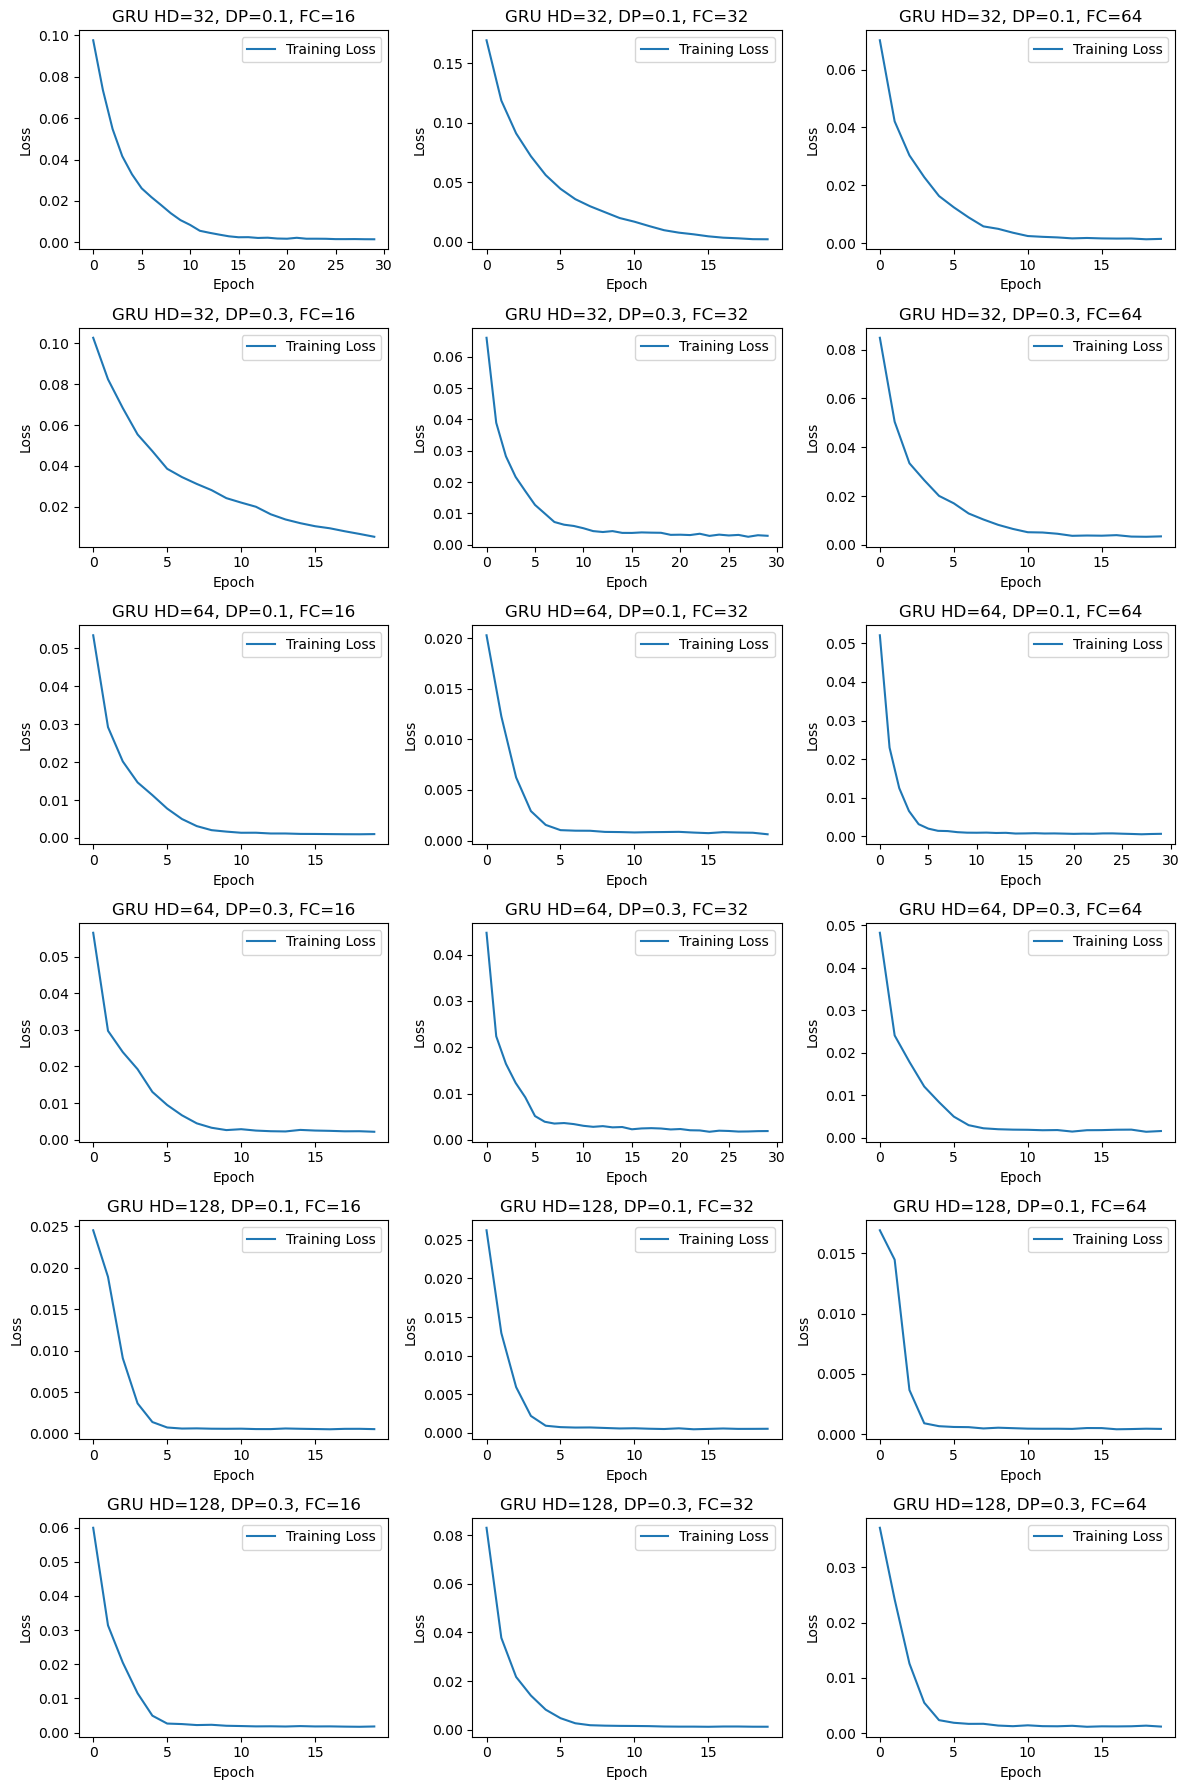

In [47]:
total_histories = len(histories)
cols = 3
rows = (total_histories + cols - 1) // cols

plt.figure(figsize=(cols * 4, rows * 3))

for idx, record in enumerate(histories):
    plt.subplot(rows, cols, idx + 1)
    plt.plot(record['History']['loss'], label='Training Loss')
    # plt.plot(record['History']['val_loss'], label='Validation Loss')
    plt.title(f"GRU HD={record['Hidden Units']}, DP={record['Dropout Rate']}, FC={record['FC Size']}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

### Model Test and Evaluation

In [48]:
# split data into training + validation and test sets
total_samples = len(features)
train_val_size = int(total_samples * 0.85)
test_size = total_samples - train_val_size

train_val_data = features[:train_val_size]
test_data = features[train_val_size:]

# Scaling
scaler = MinMaxScaler()
train_val_scaled = scaler.fit_transform(train_val_data)
test_scaled = scaler.transform(test_data)

In [49]:
print(train_val_data.shape, test_data.shape)

(2317, 2) (410, 2)


In [50]:
window_size = 5

X_train_val, y_train_val = create_sequences(train_val_scaled, window_size)
X_test, y_test = create_sequences(test_scaled, window_size)

n_features = X_train_val.shape[2]
X_train_val = X_train_val.reshape((X_train_val.shape[0], X_train_val.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

##### Train and Fit

In [51]:
set_seed(42)

In [52]:
# define models
def create_lstm_model(window_size, n_features, learning_rate, hidden_units, dropout_rate, fc_size):
	model = Sequential()
	model.add(Input(shape=(window_size, n_features)))
	model.add(LSTM(hidden_units))
	model.add(Dropout(dropout_rate))
	model.add(Dense(fc_size, activation='relu'))
	model.add(Dense(1))
	optimizer = Adam(learning_rate=learning_rate) # refer to github work original set up number
	criterion = MeanSquaredError(reduction='sum_over_batch_size')
	model.compile(optimizer, loss=criterion)
	return model

def create_gru_model(window_size, n_features, learning_rate, hidden_units, dropout_rate, fc_size):
	model = Sequential()
	model.add(Input(shape=(window_size, n_features)))
	model.add(GRU(hidden_units))
	model.add(Dropout(dropout_rate))
	model.add(Dense(fc_size, activation='relu'))
	model.add(Dense(1))
	optimizer = Adam(learning_rate=learning_rate) # refer to github work original set up number
	criterion = MeanSquaredError(reduction='sum_over_batch_size')
	model.compile(optimizer, loss=criterion)
	return model

def create_rnn_model(window_size, n_features, learning_rate, hidden_units, dropout_rate, fc_size):
	model = Sequential()
	model.add(Input(shape=(window_size, n_features)))
	model.add(SimpleRNN(hidden_units, activation='tanh'))
	model.add(Dropout(dropout_rate))
	model.add(Dense(fc_size, activation='relu'))
	model.add(Dense(1))
	optimizer = Adam(learning_rate=learning_rate) # refer to github work original set up number
	criterion = MeanSquaredError(reduction='sum_over_batch_size')
	model.compile(optimizer, loss=criterion)
	return model

In [53]:
rnn_params = {'learning_rate': 5e-4,'hidden_units': 128, 'dropout_rate': 0.1, 'fc_size': 16}
lstm_params = {'learning_rate': 1e-4,'hidden_units': 64, 'dropout_rate': 0.1, 'fc_size': 8}
gru_params = {'learning_rate': 1e-4, 'hidden_units': 64, 'dropout_rate': 0.3, 'fc_size': 32}

In [54]:
model_rnn = create_rnn_model(window_size, n_features, **rnn_params)
model_lstm = create_lstm_model(window_size, n_features, **lstm_params)
model_gru = create_gru_model(window_size, n_features, **gru_params)

In [55]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6)
callbacks = [reduce_lr]

In [56]:
history_lstm = model_lstm.fit(X_train_val, y_train_val, epochs=20, batch_size=32, shuffle=False, callbacks=callbacks, verbose=0)
history_gru = model_gru.fit(X_train_val, y_train_val, epochs=20, batch_size=32, shuffle=False, callbacks=callbacks, verbose=0)
history_rnn = model_rnn.fit(X_train_val, y_train_val, epochs=20, batch_size=32, shuffle=False,callbacks=callbacks, verbose=0)

In [57]:
# history_lstm = model_lstm.fit(X_train_val, y_train_val, epochs=10, batch_size=32, shuffle=False, verbose=0)
# history_gru = model_gru.fit(X_train_val, y_train_val, epochs=10, batch_size=32, shuffle=False, verbose=0)
# history_rnn = model_rnn.fit(X_train_val, y_train_val, epochs=10, batch_size=32, shuffle=False, verbose=0)

##### Test Evaluaiton

In [58]:
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)
y_pred_rnn = model_rnn.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [59]:
y_pred_lstm_inv = scaler.inverse_transform(np.concatenate([y_pred_lstm, np.zeros((y_pred_lstm.shape[0], n_features - 1))], axis=1))[:, 0]
y_pred_gru_inv = scaler.inverse_transform(np.concatenate([y_pred_gru, np.zeros((y_pred_gru.shape[0], n_features - 1))], axis=1))[:, 0]
y_pred_rnn_inv = scaler.inverse_transform(np.concatenate([y_pred_rnn, np.zeros((y_pred_rnn.shape[0], n_features - 1))], axis=1))[:, 0]

y_test_actual_inv  = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], n_features - 1))], axis=1))[:, 0]

In [60]:
test_lstm_rmse = np.sqrt(mean_squared_error(y_test_actual_inv, y_pred_lstm_inv))
test_lstm_mae = mean_absolute_error(y_test_actual_inv, y_pred_lstm_inv)
test_lstm_mape = mean_absolute_percentage_error(y_test_actual_inv, y_pred_lstm_inv) * 100
test_lstm_direction_actual = np.sign(np.diff(y_test_actual_inv))
test_lstm_direction_pred = np.sign(np.diff(y_pred_lstm_inv))
test_lstm_directional_accuracy = np.mean(test_lstm_direction_actual == test_lstm_direction_pred) * 100

In [61]:
test_gru_rmse = np.sqrt(mean_squared_error(y_test_actual_inv, y_pred_gru_inv))
test_gru_mae = mean_absolute_error(y_test_actual_inv, y_pred_gru_inv)
test_gru_mape = mean_absolute_percentage_error(y_test_actual_inv, y_pred_gru_inv) * 100
test_gru_direction_actual = np.sign(np.diff(y_test_actual_inv))
test_gru_direction_pred = np.sign(np.diff(y_pred_gru_inv))
test_gru_directional_accuracy = np.mean(test_gru_direction_actual == test_gru_direction_pred) * 100

In [62]:
test_rnn_rmse = np.sqrt(mean_squared_error(y_test_actual_inv, y_pred_rnn_inv))
test_rnn_mae = mean_absolute_error(y_test_actual_inv, y_pred_rnn_inv)
test_rnn_mape = mean_absolute_percentage_error(y_test_actual_inv, y_pred_rnn_inv) * 100
test_rnn_direction_actual = np.sign(np.diff(y_test_actual_inv))
test_rnn_direction_pred = np.sign(np.diff(y_pred_rnn_inv))
test_rnn_directional_accuracy = np.mean(test_rnn_direction_actual == test_rnn_direction_pred) * 100

In [63]:
results = pd.DataFrame({
    'Model': ['LSTM', 'GRU', 'SimpleRNN'],
    'Leanring Rate':  [lstm_params['learning_rate'], gru_params['learning_rate'], rnn_params['learning_rate']],
    'Hidden Units': [lstm_params['hidden_units'], gru_params['hidden_units'], rnn_params['hidden_units']],
    'Dropout Rate': [lstm_params['dropout_rate'], gru_params['dropout_rate'], rnn_params['dropout_rate']],
    'FC Size': [lstm_params['fc_size'], gru_params['fc_size'], rnn_params['fc_size']],
    'RMSE': [test_lstm_rmse, test_gru_rmse, test_rnn_rmse],
    'MAE': [test_lstm_mae, test_gru_mae, test_rnn_mae],
    'MAPE (%)': [test_lstm_mape, test_gru_mape, test_rnn_mape],
    'Directional Accuracy (%)': [
        test_lstm_directional_accuracy,
        test_gru_directional_accuracy,
        test_rnn_directional_accuracy
    ]
})

# Display the DataFrame
print(results)

       Model  Leanring Rate  Hidden Units  Dropout Rate  FC Size       RMSE  \
0       LSTM         0.0001            64           0.1        8   7.486467   
1        GRU         0.0001            64           0.3       32   4.023817   
2  SimpleRNN         0.0005           128           0.1       16  15.030780   

         MAE  MAPE (%)  Directional Accuracy (%)  
0   6.232696  3.171663                 48.267327  
1   3.118937  1.615527                 50.990099  
2  13.373103  6.752002                 47.524752  


##### Visiluization

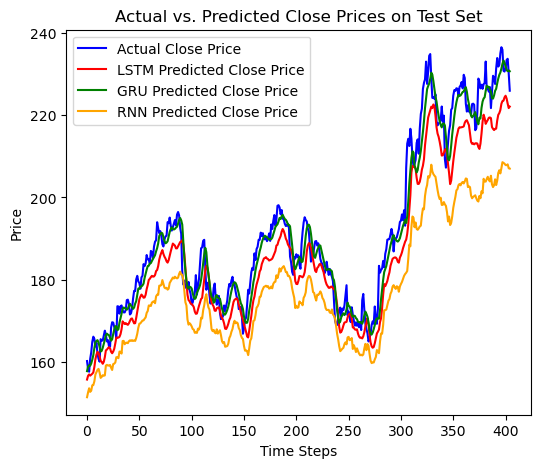

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(y_test_actual_inv, label='Actual Close Price', color='blue')
plt.plot(y_pred_lstm_inv, label='LSTM Predicted Close Price', color='red')
plt.plot(y_pred_gru_inv, label='GRU Predicted Close Price', color='green')
plt.plot(y_pred_rnn_inv, label='RNN Predicted Close Price', color='orange')
plt.title('Actual vs. Predicted Close Prices on Test Set')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

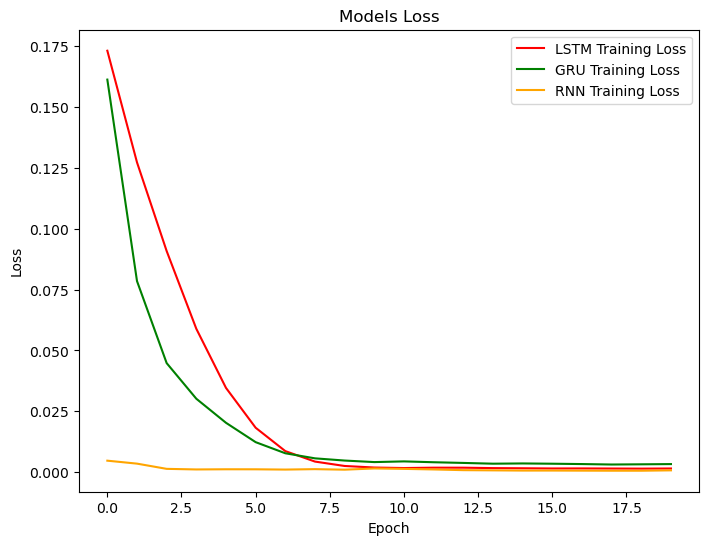

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss', color='red')
plt.plot(history_gru.history['loss'], label='GRU Training Loss', color='green')
plt.plot(history_rnn.history['loss'], label='RNN Training Loss', color='orange')
plt.title('Models Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()